## American-Sign-Language
O ficheiro *sign_mnist_test.csv* contém 7172 exemplos de teste de gestos.

Os dados de teste (7172 casos) têm uma linha de cabeçalho de rótulo, pixel1, pixel2 ... pixel784 que representa uma única imagem de 28x28 pixels com valores em tons de cinza entre 0-255. Os dados de imagem do gesto de mão original representavam vários utilizadores repetindo o gesto em diferentes fundos.

Cada um desses exemplos de teste torna-se uma única linha no array X. Isso dá uma (7172, 785) forma X, onde em cada linha estão os pixels de uma imagem.

Y é um vetor de forma (7172, 1) dos rótulos do conjunto de teste. Os dados foram rotulados da seguinte maneira: o índice 0 corresponde a A, o índice 1 corresponde a B, o índice 2 corresponde a C e assim sucessivamente. É de saliantar que não existe dados para os índice 9 e 25, uma vez que estes gestos apresentam movimentos.

In [27]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.io import loadmat
#import sys
#from PIL import Image
#import itertools
#from sklearn.svm import SVC
#from sklearn.preprocessing import LabelBinarizer
#from sklearn.neural_network import MLPClassifier
#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
from keras.preprocessing.image import img_to_array

In [30]:
# get train data 
dataTrain = pd.read_csv('sign_mnist_train.csv')
yTrain = dataTrain['label'].values
dataTrain.drop('label', axis = 1, inplace = True)

# get test data 
dataTest = pd.read_csv('sign_mnist_test.csv')
yTest = dataTest['label'].values
dataTest.drop('label', axis = 1, inplace = True)
dataTest.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [72]:
# get train data to array
xTrain = dataTrain.values

# get test data to array
xTest = dataTest.values

# get all letters
unique_val = np.array(yTrain)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [73]:
xTrain = np.array(xTrain.reshape(-1,28,28,1))
xTest = np.array(xTest.reshape(-1,28,28,1))
print(xTrain.shape)
print(xTest.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


> "-1" especifica que esta dimensão no eixo atual deve ser calculada dinamicamente de acordo com a regra de que os elementos totais do tensor permanecem inalterados. Isso nos permite tratar batch_size (parâmetro com valor -1) como um hiperparâmetro que podemos ajustar.

In [74]:
# convert multi-class labels to binary labels (belong or does not belong to the class)
lbTrain = LabelBinarizer()
lbTest = LabelBinarizer()
yTrain = lbTrain.fit_transform(yTrain)
yTest = lbTest.fit_transform(yTest)
print(yTrain)
print(yTest)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


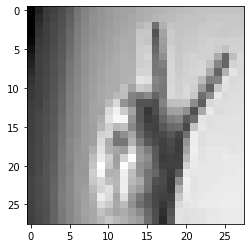

In [75]:
# show one image of train dataset 
plt.imshow(xTrain[700].reshape(28,28),cmap='gray')

In [76]:
batch_size = 128
# number of classes
num_classes = 24
epochs = 100

From the definition of Keras documentation the **Sequential** model is a linear stack of layers.You can create a Sequential model by passing a list of layer instances to the constructor.
**kernel_size**: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
**activation**: Activation function to use. If you don't specify anything, no activation is applied (see keras.activations).
**input shape**: 4+D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.

In [77]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [78]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [79]:
history = model.fit(xTrain, yTrain, validation_data = (xTest, yTest), epochs=epochs, batch_size=batch_size)

Epoch 1/100
215/215 [==============================] - 31s 139ms/step - loss: 4.5886 - accuracy: 0.0829 - val_loss: 2.4695 - val_accuracy: 0.2267
Epoch 2/100
215/215 [==============================] - 29s 135ms/step - loss: 2.3155 - accuracy: 0.2789 - val_loss: 1.6663 - val_accuracy: 0.5124
Epoch 3/100
215/215 [==============================] - 29s 134ms/step - loss: 1.6831 - accuracy: 0.4540 - val_loss: 1.0807 - val_accuracy: 0.6697
Epoch 4/100
215/215 [==============================] - 29s 135ms/step - loss: 1.2682 - accuracy: 0.5677 - val_loss: 0.9492 - val_accuracy: 0.6933
Epoch 5/100
215/215 [==============================] - 26s 120ms/step - loss: 1.0235 - accuracy: 0.6508 - val_loss: 0.7174 - val_accuracy: 0.7750
Epoch 6/100
215/215 [==============================] - 25s 117ms/step - loss: 0.8945 - accuracy: 0.6942 - val_loss: 0.5557 - val_accuracy: 0.8105
Epoch 7/100
215/215 [==============================] - 22s 104ms/step - loss: 0.6736 - accuracy: 0.7673 - val_loss: 0.4775 -

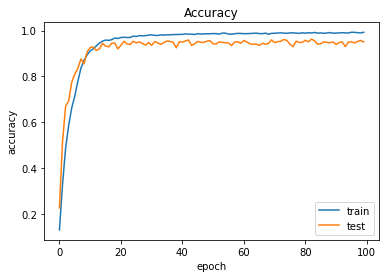

In [80]:
# accurary plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [81]:
model.save('sign_language')

INFO:tensorflow:Assets written to: sign_language\assets


In [82]:
alphabet = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    proba = model.predict(image)
    idx = np.argmax(proba)
    return alphabet[idx]

In [83]:
classify(xTrain[3]*255)

'C'

In [84]:
print(yTrain[3])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
